## ProjF2 - Data Exploration

Use this document as a template to provide some exploratory analysis of your data similar to the one in ProjC1. You are welcome to go in as much depth as needed.

Make sure you keep the sections specified in this template, but you are welcome to add more cells with your code or explanation as needed.

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mat73
import cv2
from skimage import io,color, filters, exposure
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA

### 1. Load and Visualize Data

Let's start by loading your entire dataset or a sample if it is a larger dataset.

In [107]:
# Input
dataset_dir = '/Users/prachi/Documents/Semester2/NNDL/Project_F/Data_2021/Sky_Images'
sky_image_files = [file for file in os.listdir(dataset_dir) if file.endswith(('JPG', 'jpeg', 'png', 'bmp'))]

num_samples = min(len(sky_image_files), 3) 
sample_images = sky_image_files[:num_samples]

In [108]:
# Output
data = mat73.loadmat('/Users/prachi/Documents/Semester2/NNDL/Project_F/Data_2021/Mat_files/20210524_1345.mat')

Provide some visualization of the data. For example,
- If your data is time series, you can plot a sequence and the response or label.
- If tabular data, you can plot histograms of the data.
- If working with image recognition or segmentation, you can show an image and the corresponding output.
- If it is a video that you are processing, just show screenshots.
- If doing something with reinforcement learning, you can provide samples of the simulation environment used.

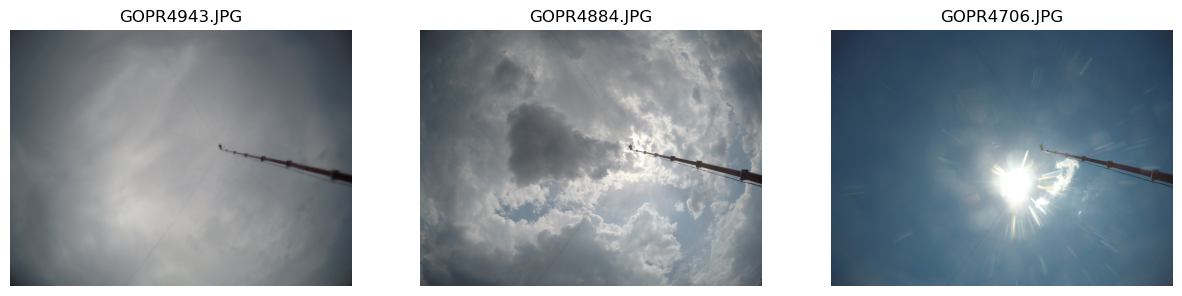

In [109]:
# Input
plt.figure(figsize=(15, 5))
for i, image_file in enumerate(sample_images, start=1):
    image_path = os.path.join(dataset_dir, image_file)
    image = io.imread(image_path)
    plt.subplot(1, num_samples, i)
    plt.imshow(image)
    plt.title(image_file)
    plt.axis('off')
plt.show()

(950, 2891, 250)


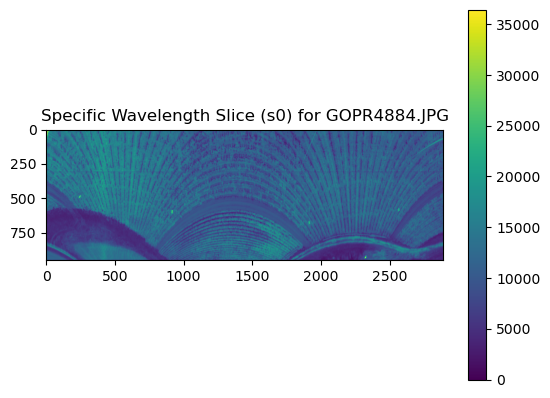

(950, 2891, 250)


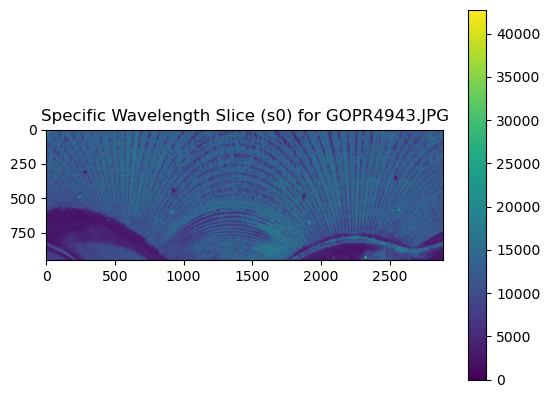

(950, 2896, 250)


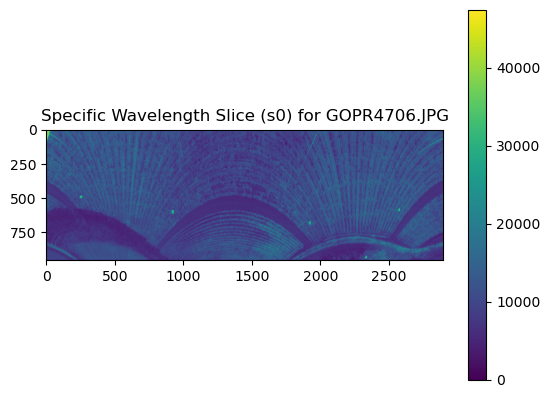

In [110]:
# Output
dataset_dir_mat = '/Users/prachi/Documents/Semester2/NNDL/Project_F/Data_2021/Mat_files'
mat_files = [file for file in os.listdir(dataset_dir_mat) if file.endswith(('mat'))]

image_name = ['GOPR4884.JPG','GOPR4943.JPG', 'GOPR4706.JPG']
for i,mat_file in enumerate(mat_files):  
    file_path = os.path.join(dataset_dir_mat, mat_file)
    data = mat73.loadmat(file_path)
    lambda_val = data['lambda']
    s0 = data['S0int']
    s1 = data['S1int']
    s2 = data['S2int']

    s0_slice = s0[:,:,0]
    print(s0.shape)

    plt.imshow(s0_slice)
    plt.colorbar()
    plt.title(f'Specific Wavelength Slice (s0) for {image_name[i]}')
    plt.show()

### 2. Compute Some Statistics from your Data

First, extract some characterisitics about the input (e.g., image size, means and standard deviation of values, sample frequency).

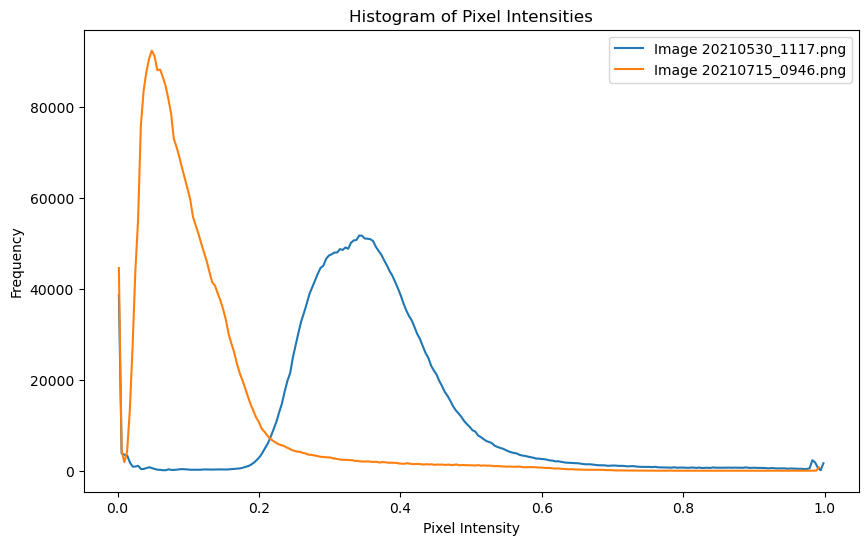

In [111]:
dataset_dir_crop = '/Users/prachi/Documents/Semester2/NNDL/Project_F/Data_2021/Crop'

crop_image_files = [file for file in os.listdir(dataset_dir_crop) if file.endswith(('png'))]

plt.figure(figsize=(10, 6))
for image_file in crop_image_files:  
    image_path = os.path.join(dataset_dir_crop, image_file)
    image = io.imread(image_path)
    gray_image = color.rgb2gray(image)
    hist, bins = exposure.histogram(gray_image)
    plt.plot(bins, hist, label=f'Image {image_file}')

plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

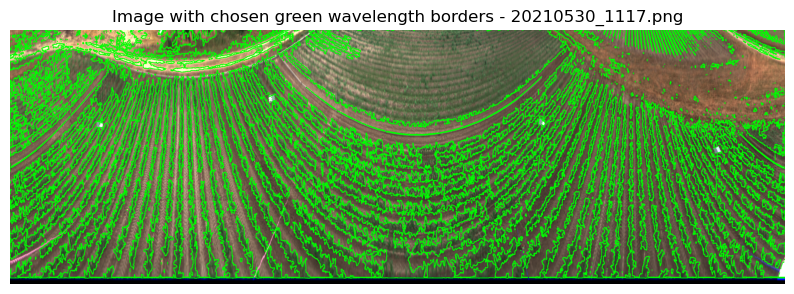

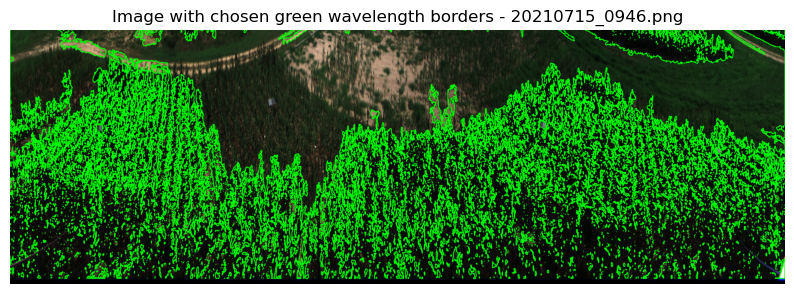

In [112]:
for image_file_name in crop_image_files:
    image_path = os.path.join(dataset_dir_crop, image_file_name)
    image = cv2.imread(image_path)

    lightened_image = cv2.convertScaleAbs(image, alpha=30, beta=0)

    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # As evident from the pixel intensity graph, high pixel intensity is higher at around 500-600nm frequency. Thus, this bandwidth can be chosen for conducting our analysis
    lower_green1 = np.array([20, 0, 25])  
    upper_green1 = np.array([80, 255, 255]) 
    lower_green2 = np.array([61, 0, 25])  
    upper_green2 = np.array([90, 255, 255]) 

    mask1 = cv2.inRange(hsv_image, lower_green1, upper_green1)
    mask2 = cv2.inRange(hsv_image, lower_green2, upper_green2)

    combined_mask = cv2.bitwise_or(mask1, mask2)

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  

    image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.imshow(image_with_contours_rgb)
    plt.axis('off')
    plt.title(f'Image with chosen green wavelength borders - {image_file_name}')
    plt.show()

In [113]:
# Input (Sky Images) Texture Analysis
for image_file in sample_images:
    image_path = os.path.join(dataset_dir, image_file)
    image = io.imread(image_path)
    gray_image = color.rgb2gray(image)
    smoothed_image = filters.gaussian(gray_image, sigma=1)
    energy = np.sum(smoothed_image**2)
    entropy = -np.sum(smoothed_image * np.log(smoothed_image + 1e-6))
    contrast = np.sum((smoothed_image - np.mean(smoothed_image))**2)

    print(f"\nTexture Analysis Results for {image_file}:")
    print(f"Energy: {energy}")
    print(f"Entropy: {entropy}")
    print(f"Contrast: {contrast}")


Texture Analysis Results for GOPR4943.JPG:
Energy: 3253106.1699894518
Entropy: 3914018.1389917885
Contrast: 225576.42199612566

Texture Analysis Results for GOPR4884.JPG:
Energy: 3693777.3233964355
Entropy: 3769987.9137593284
Contrast: 257451.800360727

Texture Analysis Results for GOPR4706.JPG:
Energy: 2190491.7885393756
Entropy: 4092043.208779645
Contrast: 279904.30803800246


In [114]:
# Input (Sky Images) Color Statistics
for image_file in sample_images:
    image_path = os.path.join(dataset_dir, image_file)
    image = io.imread(image_path)
    lab_image = color.rgb2lab(image)
    mean_l_channel = np.mean(lab_image[:,:,0])
    std_l_channel = np.std(lab_image[:,:,0])
    mean_a_channel = np.mean(lab_image[:,:,1])
    std_a_channel = np.std(lab_image[:,:,1])
    mean_b_channel = np.mean(lab_image[:,:,2])
    std_b_channel = np.std(lab_image[:,:,2])

    print(f"\nColor Statistics for {image_file}:")
    print(f"Mean L Channel: {mean_l_channel}, Standard Deviation L Channel: {std_l_channel}")
    print(f"Mean A Channel: {mean_a_channel}, Standard Deviation A Channel: {std_a_channel}")
    print(f"Mean B Channel: {mean_b_channel}, Standard Deviation B Channel: {std_b_channel}")


Color Statistics for GOPR4943.JPG:
Mean L Channel: 53.28010007405408, Standard Deviation L Channel: 13.849960607267896
Mean A Channel: -0.705447035786444, Standard Deviation A Channel: 0.9195261500603842
Mean B Channel: -2.3504560566648536, Standard Deviation B Channel: 2.1767461387029985

Color Statistics for GOPR4884.JPG:
Mean L Channel: 56.533410699479916, Standard Deviation L Channel: 14.538197311428627
Mean A Channel: -1.0465878937951438, Standard Deviation A Channel: 1.0140214705610762
Mean B Channel: -2.7448793458900016, Standard Deviation B Channel: 2.315009896129054

Color Statistics for GOPR4706.JPG:
Mean L Channel: 43.05252199271083, Standard Deviation L Channel: 15.18551771670741
Mean A Channel: -4.097452898085188, Standard Deviation A Channel: 1.9147690285791432
Mean B Channel: -13.393254543030018, Standard Deviation B Channel: 4.2603557145015225


Next, provide some characteristics about your output (e.g., histograms, spatial distribution of bounding boxes in the case of object detection, etc.). In the case of cases such as tasks such as reinforcement learning, you can provide details about the desired output and rewards used. You can show some correlations between inputs and outputs if possible.

DoLP for below image GOPR4884.JPG is 0.17023407701928905


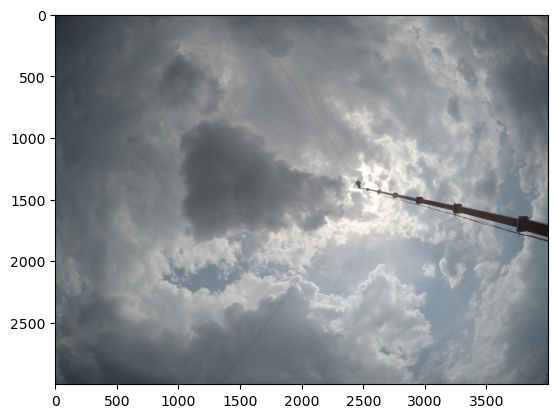

DoLP for below image GOPR4943.JPG is 0.348733232924167


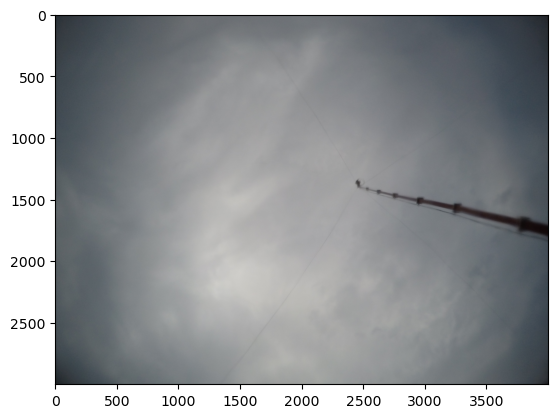

DoLP for below image GOPR4706.JPG is 0.19808882519581927


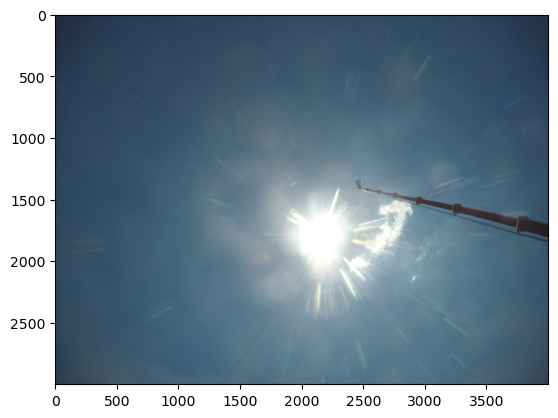

In [115]:
for m, mat_file in enumerate(mat_files):  
    file_path = os.path.join(dataset_dir_mat, mat_file)
    data = mat73.loadmat(file_path)
    lambda_val = data['lambda']
    s0 = data['S0int']
    s1 = data['S1int']
    s2 = data['S2int']
    
    s0 , s1, s2 = s0[800:900,600:700,55],s1[800:900,600:700,55],s2[800:900,600:700,55]
    LL=np.zeros([100,100])
    DOLP = np.zeros([100,100])
    for i in range(100):
        for j in range(100):
            if ~np.isnan(s1[i][j].all()) and ~np.isnan(s2[i][j].all()) and ~np.isnan(s0[i][j].all()) and s0[i][j]**2 >= s1[i][j]**2 + s2[i][j]**2:
                    LL[i][j] =np.sqrt(s1[i][j]**2+s2[i][j]**2)
                    DOLP[i][j] = LL[i][j]/s0[i][j]

    DOLP = DOLP[~np.isnan(DOLP)]

    AOP = 0.5 * np.arctan2(s0, s1)
    circular_threshold = 0.99
    mean_DOLP = np.mean(DOLP)
    mean_AOP = np.mean(AOP)
    print(f'DoLP for below image {image_name[m]} is {mean_DOLP}')
    
    image_path = os.path.join(dataset_dir, image_name[m])
    image = io.imread(image_path)
    plt.imshow(image)
    plt.show()

The DOLP of the images can be seen to change with the change in the amount of sunlight received by the crop field. However, the DOLP calculated is a combination of s0, s1 and s2-which is an overall analysis of the image. Further data cleaning and characterized DOLP calculation will signify a trend of values for cloudy, cloudcover and sunny images respectively.

### 3. Comment on Your Data

Answer these questions as appropriate?
- Is your data balanced?
- Are there disparities in your input data? Does it show some specific patterns?

ANSWER: The classes of data are balanced for the entries of 2020, where we can see both aerial images of the crops as well as the suncover. In the .mat files of said images, we can see s0, s1, and s2, ie. the polarization data of the crops. However, insufficient data is available for 2021, where there is class disparity between the groups of images. A lot of polarization data has NaN values, which make it difficult to normalize it across different wavelength fronts of the data. Finally, volumous data gives an opportunity to explore it, as well as a challenge to sparse it given current processor capabilities.